# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        if 'main' in city_weather and 'temp_max' in city_weather['main']:
            
            city_max_temp = city_weather["main"]["temp_max"]


        # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_weather["coord"]["lat"], 
                              "Lng": city_weather["coord"]["lon"], 
                              "Max Temp": city_max_temp,
                              "Humidity": city_weather["main"]["humidity"],
                              "Cloudiness": city_weather["clouds"]["all"],
                              "Wind Speed": city_weather["wind"]["speed"],
                              "Country": city_weather["sys"]["country"],
                              "Date": city_weather["dt"]})
        else:
            print(f"Max temperature not found for {city}. Skipping...")
    # If an error is experienced, skip the city
    except Exception as e:
        print(f"Error fetching data for {city}: {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | elmendorf air force base
Max temperature not found for elmendorf air force base. Skipping...
Processing Record 2 of Set 1 | nashtarud
Max temperature not found for nashtarud. Skipping...
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | karratha
Processing Record 5 of Set 1 | alotau
Max temperature not found for alotau. Skipping...
Processing Record 6 of Set 1 | nadym
Processing Record 7 of Set 1 | vadso
Processing Record 8 of Set 1 | yugorsk
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | weno
Processing Record 12 of Set 1 | forbes
Processing Record 13 of Set 1 | ngaoundere
Processing Record 14 of Set 1 | udachny
Processing Record 15 of Set 1 | isafjordur
Processing Record 16 of Set 1 | chardara
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | kingston
Processing Record 19 of Set

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,285.22,77,68,5.20,AU,1699076467
1,karratha,-20.7377,116.8463,309.36,29,53,6.95,AU,1699076323
2,nadym,65.5333,72.5167,266.38,91,100,9.17,RU,1699076468
3,vadso,70.0744,29.7487,267.24,86,13,4.12,NO,1699076469
4,yugorsk,61.3133,63.3319,268.65,76,94,6.88,RU,1699076323


In [19]:
import os
# Create the output_data directory
output_directory = 'output_data'

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")



In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,285.22,77,68,5.20,AU,1699076467
1,karratha,-20.7377,116.8463,309.36,29,53,6.95,AU,1699076323
2,nadym,65.5333,72.5167,266.38,91,100,9.17,RU,1699076468
3,vadso,70.0744,29.7487,267.24,86,13,4.12,NO,1699076469
4,yugorsk,61.3133,63.3319,268.65,76,94,6.88,RU,1699076323


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

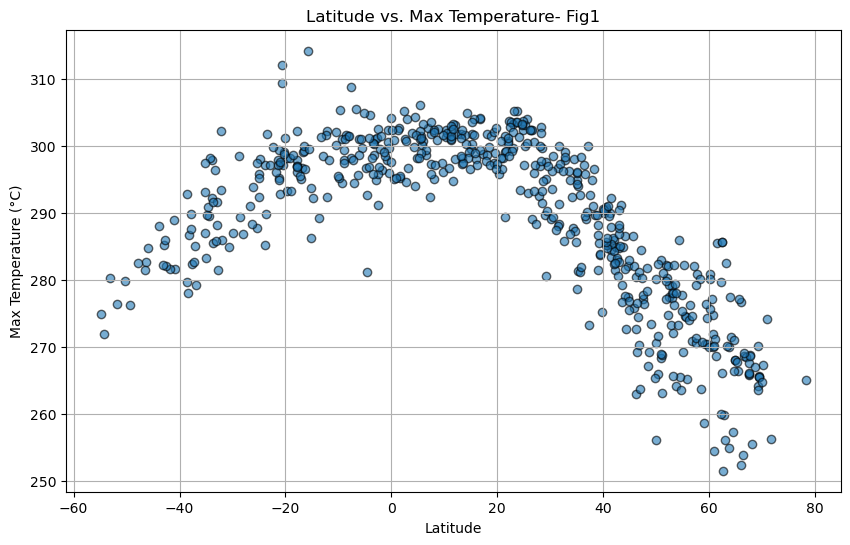

<Figure size 640x480 with 0 Axes>

In [21]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.6, edgecolors="k", linewidths=1)

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Latitude vs. Max Temperature- Fig1")

# Show the grid
plt.grid()

# Show the plot
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

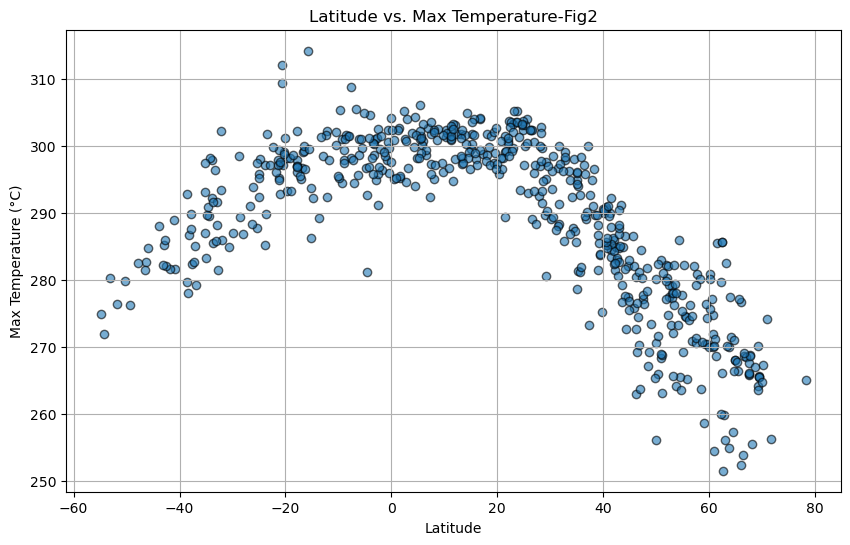

<Figure size 640x480 with 0 Axes>

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.6, edgecolors="k", linewidths=1)

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Latitude vs. Max Temperature-Fig2")

# Show the grid
plt.grid()

# Show the plot
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

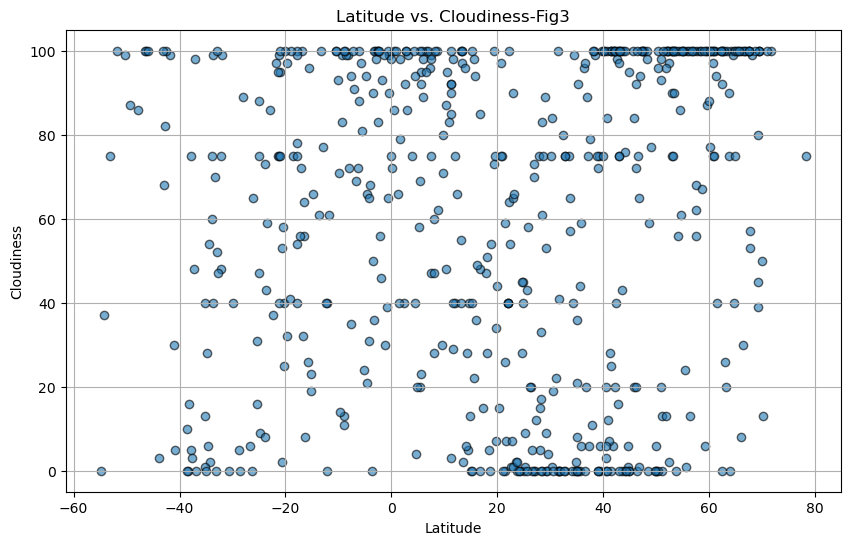

<Figure size 640x480 with 0 Axes>

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=0.6, edgecolors="k", linewidths=1)

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness-Fig3")

# Show the grid
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

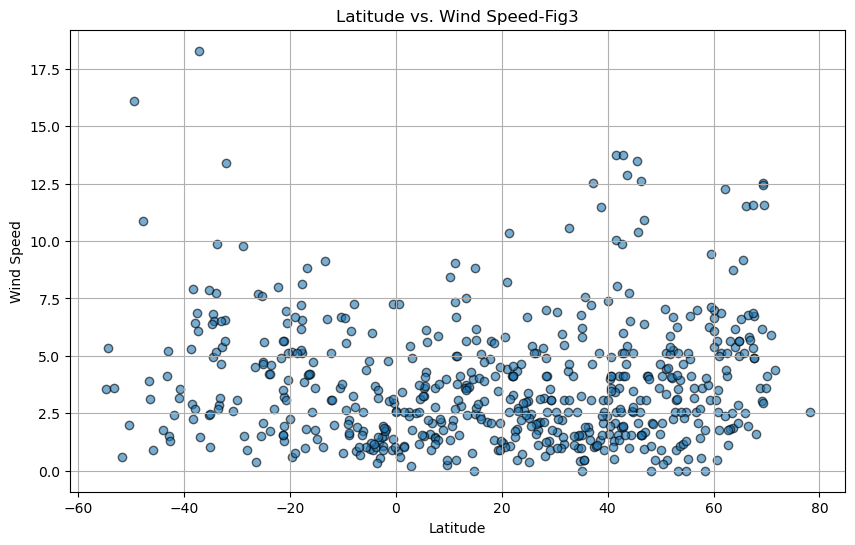

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.6, edgecolors="k", linewidths=1)

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed-Fig3")

# Show the grid
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
from sklearn.linear_model import LinearRegression

# def plot_linear_regression(x, y, title, x_label, y_label):

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,nadym,65.5333,72.5167,266.38,91,100,9.17,RU,1699076468
3,vadso,70.0744,29.7487,267.24,86,13,4.12,NO,1699076469
4,yugorsk,61.3133,63.3319,268.65,76,94,6.88,RU,1699076323
7,weno,7.4515,151.8468,301.75,72,47,2.78,FM,1699076470
9,ngaoundere,7.3167,13.5833,292.32,91,96,1.46,CM,1699076110


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,285.22,77,68,5.20,AU,1699076467
1,karratha,-20.7377,116.8463,309.36,29,53,6.95,AU,1699076323
5,invercargill,-46.4000,168.3500,282.60,92,100,3.13,NZ,1699076324
6,waitangi,-43.9535,-176.5597,288.05,90,3,1.79,NZ,1699076324
8,forbes,-33.3833,148.0167,296.44,43,70,2.88,AU,1699076324


###  Temperature vs. Latitude Linear Regression Plot

The r value is: 0.771830357037214


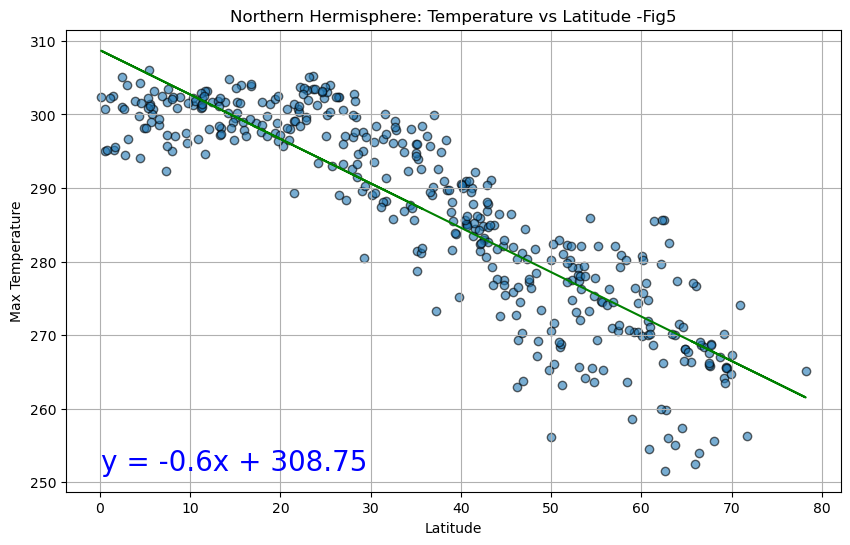

In [39]:
# Linear regression on Northern Hemisphere
# Extract x and y data for the linear regression
x = northern_hemi_df['Lat'].astype("float")
y = northern_hemi_df['Max Temp'].astype("float")

# Perform linear regression to get the slope, intercept, r-value, p-value, and stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Calculate the predicted values using the linear regression model
regress_values = x * slope + intercept

# Define the equation of the regression line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot of the data points
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], alpha=0.6, edgecolors="k", linewidths=1)

# Plot the linear regression line
plt.plot(x, regress_values, "g")

# Annotate the plot with the equation of the line
plt.annotate(line_eq, (x.min(), y.min()), fontsize=20, color="blue")

# Add labels for the x and y axes
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("Northern Hermisphere: Temperature vs Latitude -Fig5")

# Calculate and print the coefficient of determination (r-squared)
r_squared = rvalue**2
print("The r value is:", r_squared)

# Show the grid
plt.grid()

# Save the figure
plt.savefig("output_data/Fig5.png")

# Display the plot
plt.show()

The r value is: 0.546777876613145


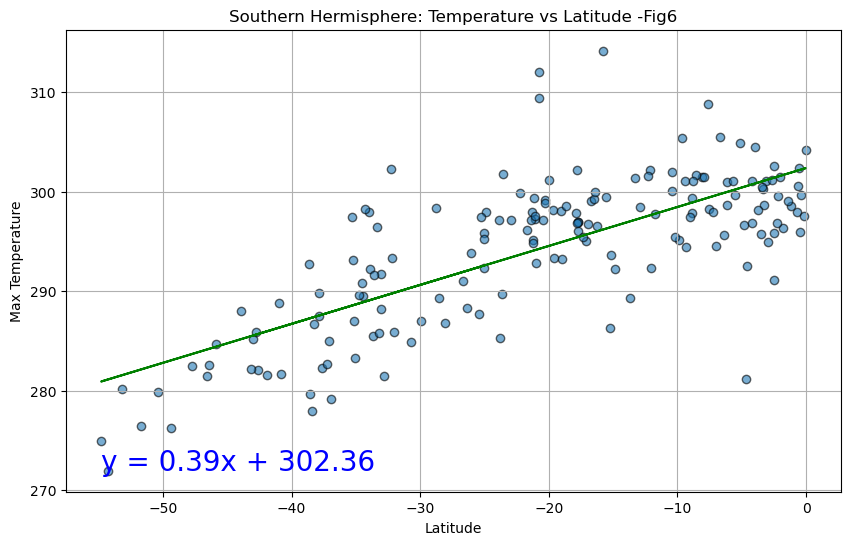

In [40]:
# Linear regression on Southern Hemisphere
# Extract x and y data for the linear regression
x = southern_hemi_df['Lat'].astype("float")
y = southern_hemi_df['Max Temp'].astype("float")

# Perform linear regression to get the slope, intercept, r-value, p-value, and stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Calculate the predicted values using the linear regression model
regress_values = x * slope + intercept

# Define the equation of the regression line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot of the data points
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], alpha=0.6, edgecolors="k", linewidths=1)

# Plot the linear regression line
plt.plot(x, regress_values, "g")

# Annotate the plot with the equation of the line
plt.annotate(line_eq, (x.min(), y.min()), fontsize=20, color="blue")

# Add labels for the x and y axes
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("Southern Hermisphere: Temperature vs Latitude -Fig6")

# Calculate and print the coefficient of determination (r-squared)
r_squared = rvalue**2
print("The r value is:", r_squared)

# Show the grid
plt.grid()

# Save the figure
plt.savefig("output_data/Fig6.png")

# Display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.0371913477201775


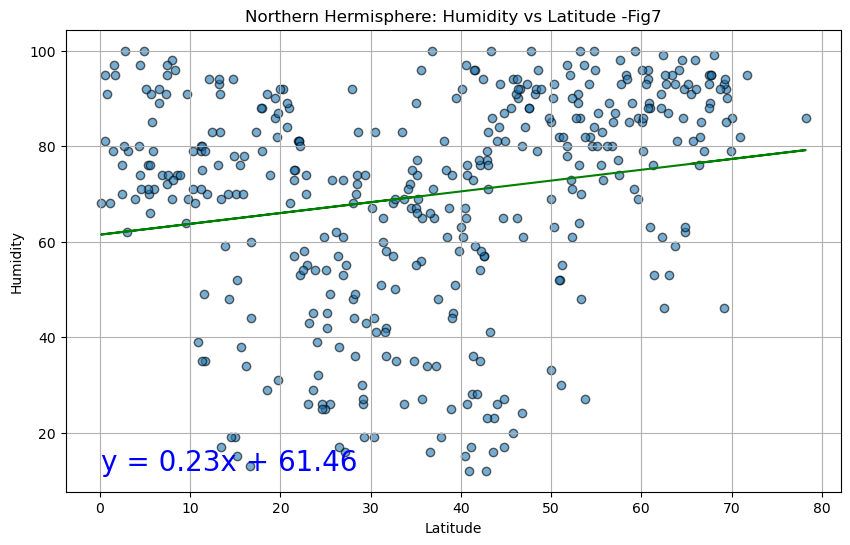

In [41]:
# Northern Hemisphere
# Extract x and y data for the linear regression
x = northern_hemi_df['Lat'].astype("float")
y = northern_hemi_df['Humidity'].astype("float")

# Perform linear regression to get the slope, intercept, r-value, p-value, and stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Calculate the predicted values using the linear regression model
regress_values = x * slope + intercept

# Define the equation of the regression line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot of the data points
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], alpha=0.6, edgecolors="k", linewidths=1)

# Plot the linear regression line
plt.plot(x, regress_values, "g")

# Annotate the plot with the equation of the line
plt.annotate(line_eq, (x.min(), y.min()), fontsize=20, color="blue")

# Add labels for the x and y axes
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Hermisphere: Humidity vs Latitude -Fig7")

# Calculate and print the coefficient of determination (r-squared)
r_squared = rvalue**2
print("The r value is:", r_squared)

# Show the grid
plt.grid()

# Save the figure
plt.savefig("output_data/Fig7.png")

# Display the plot
plt.show()

The r value is: 0.021554708527314847


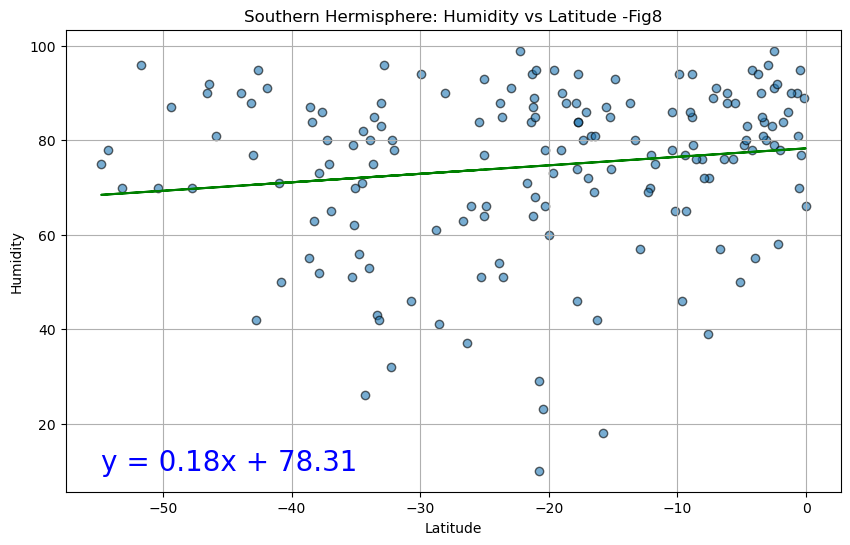

In [42]:
# Southern Hemisphere
# Extract x and y data for the linear regression
x = southern_hemi_df['Lat'].astype("float")
y = southern_hemi_df['Humidity'].astype("float")

# Perform linear regression to get the slope, intercept, r-value, p-value, and stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Calculate the predicted values using the linear regression model
regress_values = x * slope + intercept

# Define the equation of the regression line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot of the data points
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], alpha=0.6, edgecolors="k", linewidths=1)



# Plot the linear regression line
plt.plot(x, regress_values, "g")

# Annotate the plot with the equation of the line
plt.annotate(line_eq, (x.min(), y.min()), fontsize=20, color="blue")

# Add labels for the x and y axes
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Hermisphere: Humidity vs Latitude -Fig8")

# Calculate and print the coefficient of determination (r-squared)
r_squared = rvalue**2
print("The r value is:", r_squared)

# Show the grid
plt.grid()

# Save the figure
plt.savefig("output_data/Fig8.png")

# Display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.02927507769754999


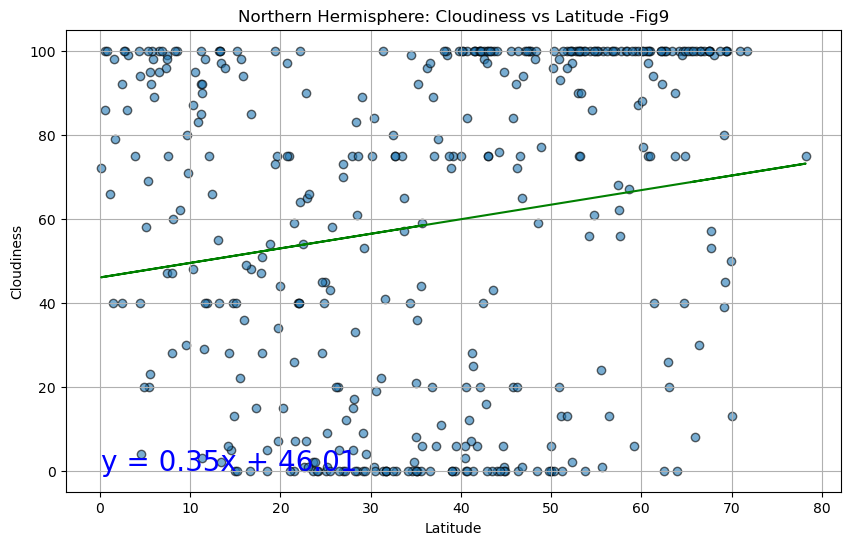

In [43]:
# Northern Hemisphere
# Extract x and y data for the linear regression
x = northern_hemi_df['Lat'].astype("float")
y = northern_hemi_df['Cloudiness'].astype("float")

# Perform linear regression to get the slope, intercept, r-value, p-value, and stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Calculate the predicted values using the linear regression model
regress_values = x * slope + intercept

# Define the equation of the regression line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot of the data points
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], alpha=0.6, edgecolors="k", linewidths=1)



# Plot the linear regression line
plt.plot(x, regress_values, "g")

# Annotate the plot with the equation of the line
plt.annotate(line_eq, (x.min(), y.min()), fontsize=20, color="blue")

# Add labels for the x and y axes
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Hermisphere: Cloudiness vs Latitude -Fig9")

# Calculate and print the coefficient of determination (r-squared)
r_squared = rvalue**2
print("The r value is:", r_squared)

# Show the grid
plt.grid()

# Save the figure
plt.savefig("output_data/Fig9.png")

# Display the plot
plt.show()

The r value is: 0.05635228052532305


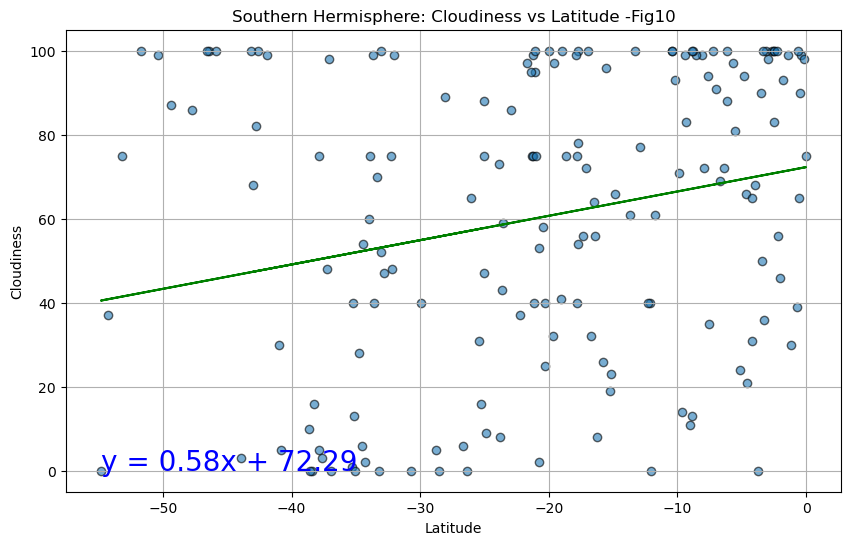

In [44]:
# Southern Hemisphere
# Extract x and y data for the linear regression
x = southern_hemi_df['Lat'].astype("float")
y = southern_hemi_df['Cloudiness'].astype("float")

# Perform linear regression to get the slope, intercept, r-value, p-value, and stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Calculate the predicted values using the linear regression model
regress_values = x * slope + intercept

# Define the equation of the regression line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot of the data points
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], alpha=0.6, edgecolors="k", linewidths=1)



# Plot the linear regression line
plt.plot(x, regress_values, "g")

# Annotate the plot with the equation of the line
plt.annotate(line_eq, (x.min(), y.min()), fontsize=20, color="blue")

# Add labels for the x and y axes
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Hermisphere: Cloudiness vs Latitude -Fig10")

# Calculate and print the coefficient of determination (r-squared)
r_squared = rvalue**2
print("The r value is:", r_squared)

# Show the grid
plt.grid()

# Save the figure
plt.savefig("output_data/Fig10.png")

# Display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.046245926946370565


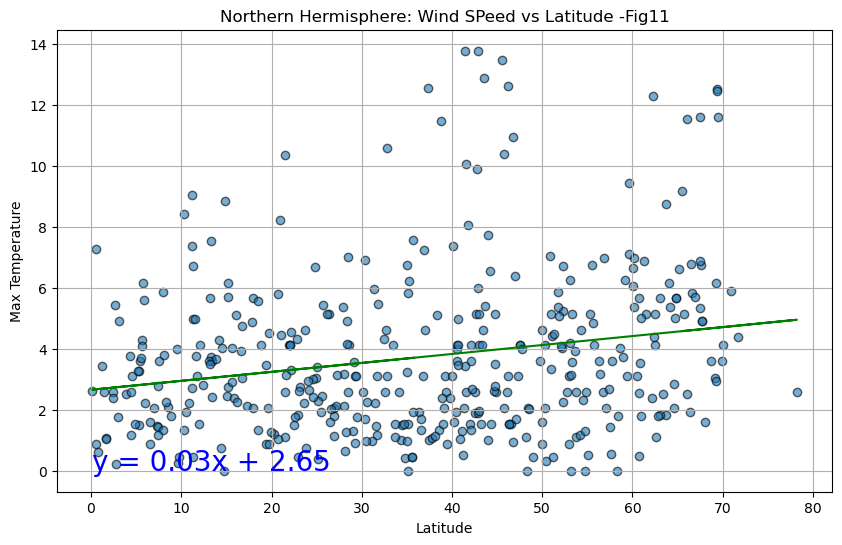

In [45]:
# Northern Hemisphere Linear regression 
# Extract x and y data for the linear regression
x = northern_hemi_df['Lat'].astype("float")
y = northern_hemi_df['Wind Speed'].astype("float")

# Perform linear regression to get the slope, intercept, r-value, p-value, and stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Calculate the predicted values using the linear regression model
regress_values = x * slope + intercept

# Define the equation of the regression line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot of the data points
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], alpha=0.6, edgecolors="k", linewidths=1)



# Plot the linear regression line
plt.plot(x, regress_values, "g")

# Annotate the plot with the equation of the line
plt.annotate(line_eq, (x.min(), y.min()), fontsize=20, color="blue")

# Add labels for the x and y axes
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("Northern Hermisphere: Wind SPeed vs Latitude -Fig11")

# Calculate and print the coefficient of determination (r-squared)
r_squared = rvalue**2
print("The r value is:", r_squared)

# Show the grid
plt.grid()

# Save the figure
plt.savefig("output_data/Fig11.png")

# Display the plot
plt.show()

The r value is: 0.09460478655719198


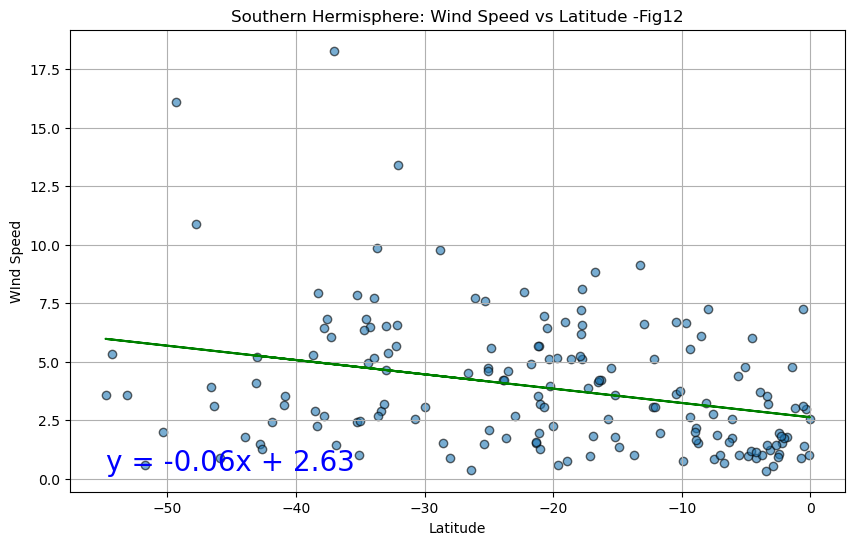

In [46]:
# Southern Hemisphere
southern_hemi_df

# Extract x and y data for the linear regression
x = southern_hemi_df['Lat'].astype("float")
y = southern_hemi_df['Wind Speed'].astype("float")

# Perform linear regression to get the slope, intercept, r-value, p-value, and stderr
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Calculate the predicted values using the linear regression model
regress_values = x * slope + intercept

# Define the equation of the regression line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot of the data points
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], alpha=0.6, edgecolors="k", linewidths=1)



# Plot the linear regression line
plt.plot(x, regress_values, "g")

# Annotate the plot with the equation of the line
plt.annotate(line_eq, (x.min(), y.min()), fontsize=20, color="blue")

# Add labels for the x and y axes
plt.xlabel('Latitude')
plt.ylabel('WInd Speed')
plt.title("Southern Hermisphere: Wind Speed vs Latitude -Fig12")

# Calculate and print the coefficient of determination (r-squared)
r_squared = rvalue**2
print("The r value is:", r_squared)

# Show the grid
plt.grid()

# Save the figure
plt.savefig("output_data/Fig12.png")

# Display the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE